In [1]:
from utility_dfcounter import *

In [32]:
counter = DFCounter('mu','1b')

nGenMCtt0 = counter.dfNGen[counter.dfNGen.name=='tt'].ngen.values[0]
df = DFCutter('mu4j','==1','mctt').getDataFrame()
nMCtt0 = counter._countDataFrameByTauDecay(df, normToLumin=False, withWeights=True)
#inc = common.getEfficiency(nMCtt0, nGenMCtt0)


nGenMCtt1 = counter.dfNGen[counter.dfNGen.name=='tt_2l2nu'].ngen.values[0]
df = DFCutter('mu4j','==1','mctt_2l2nu').getDataFrame()
nMCtt1 = counter._countDataFrameByTauDecay(df, normToLumin=False, withWeights=True)
#inclep = common.getEfficiency(nMCtt1, nGenMCtt1)

nGenMCtt2 = counter.dfNGen[counter.dfNGen.name=='tt_semilepton'].ngen.values[0]
df = DFCutter('mu4j','==1','mctt_semilepton').getDataFrame()
nMCtt2 = counter._countDataFrameByTauDecay(df, normToLumin=False, withWeights=True)
#inclepsemi = common.getEfficiency(nMCtt2, nGenMCtt2)

inc = common.getEfficiency(nMCtt0, nGenMCtt0)
inclep = common.getEfficiency(nMCtt0+nMCtt1, nGenMCtt0+nGenMCtt1)
inclepsemi = common.getEfficiency(nMCtt0+nMCtt1+nMCtt2, nGenMCtt0+nGenMCtt1+nGenMCtt2)

for i in range(21):
    print('{:0>6.3f}+/-{:0>6.3f}, {:0>6.3f}+/-{:0>6.3f}, {:0>6.3f}+/-{:0>6.3f}'.format(
            inc[0][i]*100, inc[1][i]**0.5*100,inclep[0][i]*100, inclep[1][i]**0.5*100,inclepsemi[0][i]*100, inclepsemi[1][i]**0.5*100)
         )

00.000+/-00.000 , 00.001+/-00.000 , 00.000+/-00.000 , 00.000+/-00.000
00.001+/-00.000 , 00.002+/-00.000 , 00.000+/-00.000 , 00.000+/-00.000
04.978+/-00.011 , 04.965+/-00.005 , 01.617+/-00.007 , 01.602+/-00.003
00.000+/-00.000 , 00.001+/-00.000 , 00.000+/-00.000 , 00.000+/-00.000
00.001+/-00.002 , 00.001+/-00.001 , 00.000+/-00.000 , 00.000+/-00.000
00.995+/-00.030 , 00.973+/-00.012 , 00.297+/-00.016 , 00.311+/-00.007
00.000+/-00.000 , 00.000+/-00.000 , 00.000+/-00.000 , 00.000+/-00.000
00.006+/-00.001 , 00.004+/-00.000 , 00.002+/-00.001 , 00.001+/-00.000
00.000+/-00.000 , 00.000+/-00.000 , 00.000+/-00.000 , 00.000+/-00.000
00.000+/-00.000 , 00.001+/-00.000 , 00.000+/-00.000 , 00.000+/-00.000
01.369+/-00.015 , 01.365+/-00.006 , 00.434+/-00.008 , 00.429+/-00.003
00.001+/-00.000 , 00.001+/-00.000 , 00.000+/-00.000 , 00.000+/-00.000
03.063+/-00.021 , 03.087+/-00.009 , 00.993+/-00.012 , 00.995+/-00.005
00.002+/-00.001 , 00.002+/-00.000 , 00.000+/-00.000 , 00.000+/-00.000
00.013+/-00.001 , 00

In [4]:
nGenMCtt2l = nGen.query("name=='tt_2l2nu'").ngen.values[0]
nGenMCtt   = nGen.query("name=='tt'").ngen.values[0]
nGenMCtt1l   = nGen.query("name=='tt_semilepton'").ngen.values[0]

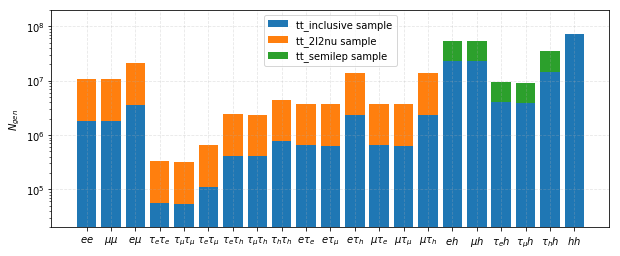

In [5]:
ind = np.arange(21)
branches = common.WWBranchNames()
plt.figure(facecolor='w',figsize=(10,4))




plt.bar(ind,nGenMCtt,label='tt_inclusive sample')
plt.bar(ind,nGenMCtt2l, bottom=nGenMCtt,label='tt_2l2nu sample')
plt.bar(ind,nGenMCtt1l, bottom=nGenMCtt+nGenMCtt2l,label='tt_semilep sample')

plt.ylabel(r'$N_{gen}$')
plt.yscale('log')
plt.ylim(2e4,2e8)
plt.grid(linestyle='--',alpha=0.3)

plt.xticks(ind, branches)
plt.legend()
plt.savefig('../plots/ngen_comparison.png',dpi=300)

In [3]:
nGen = pd.read_pickle("../data/pickles/ngen.pkl")
count = pd.read_pickle("../data/counts/count_inc.pkl")